In [275]:
import pandas as pd
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
import pickle
from nltk.tokenize import word_tokenize
from sklearn.decomposition import NMF, TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [276]:
with open('data/cleaned_album_df.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [277]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [278]:
df.head()

,song_owner,song_title,song_element,verse,artist,album
0,Childish Gambino,This Is America,[Bridge: Childish Gambino & Young Thug],"We just wanna party, Party just for you, We ju...",Childish Gambino,CG4
1,Childish Gambino,This Is America,[Chorus: Childish Gambino],"This is America, Don't catch you slippin' now,...",Childish Gambino,CG4
2,Childish Gambino,This Is America,"[Verse 1: Childish Gambino, Blocboy JB, Slim J...","This is America (skrrt, skrrt, woo), Don't cat...",Childish Gambino,CG4
3,Childish Gambino,This Is America,[Refrain: Choir & Childish Gambino],"Ooh-ooh-ooh-ooh-ooh, tell somebody, You go tel...",Childish Gambino,CG4
4,Childish Gambino,This Is America,"[Chorus: Childish Gambino, Slim Jxmmi & Young ...","This is America (woo, ayy), Don't catch you sl...",Childish Gambino,CG4


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 7026
Data columns (total 6 columns):
song_owner      5088 non-null object
song_title      5088 non-null object
song_element    5088 non-null object
verse           5088 non-null object
artist          5088 non-null object
album           5088 non-null object
dtypes: object(6)
memory usage: 278.2+ KB


In [280]:
model_df = df.copy()

In [281]:
model_df = model_df[model_df['artist'] == "Drake"]

In [282]:
# model_df['split_verse'] = ''

# for index, row in model_df.iterrows():
#     row['split_verse'] = row['verse'].split()
#     for word in row['split_verse']:
#         if word[-1] == "'":
#             word.replace("'", "g")

In [283]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,album
1406,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care
1407,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care
1410,Drake,God's Plan,[Intro],"Yeah, they wishin' and wishin' and wishin' and...",Drake,Scorpion
1411,Drake,God's Plan,[Verse 1],"I been movin' calm, don't start no trouble wit...",Drake,Scorpion
1412,Drake,God's Plan,[Chorus 1],"God's plan, God's plan, I hold back, sometimes...",Drake,Scorpion


In [284]:
model_df['verse'] = model_df['verse'].apply(lambda x: x.replace("nigga", "ninja"))
model_df['verse'] = model_df['verse'].apply(lambda x: x.replace("niggas", "ninjas"))

In [285]:
from nltk.tokenize import word_tokenize
model_df['verse_words'] = model_df['verse'].apply(lambda x: word_tokenize(x))

In [286]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,album,verse_words
1406,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ..."
1407,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ..."
1410,Drake,God's Plan,[Intro],"Yeah, they wishin' and wishin' and wishin' and...",Drake,Scorpion,"[Yeah, ,, they, wishin, ', and, wishin, ', and..."
1411,Drake,God's Plan,[Verse 1],"I been movin' calm, don't start no trouble wit...",Drake,Scorpion,"[I, been, movin, ', calm, ,, do, n't, start, n..."
1412,Drake,God's Plan,[Chorus 1],"God's plan, God's plan, I hold back, sometimes...",Drake,Scorpion,"[God, 's, plan, ,, God, 's, plan, ,, I, hold, ..."


In [287]:
model_df.reset_index(drop=True, inplace=True)

In [288]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,album,verse_words
0,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ..."
1,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ..."
2,Drake,God's Plan,[Intro],"Yeah, they wishin' and wishin' and wishin' and...",Drake,Scorpion,"[Yeah, ,, they, wishin, ', and, wishin, ', and..."
3,Drake,God's Plan,[Verse 1],"I been movin' calm, don't start no trouble wit...",Drake,Scorpion,"[I, been, movin, ', calm, ,, do, n't, start, n..."
4,Drake,God's Plan,[Chorus 1],"God's plan, God's plan, I hold back, sometimes...",Drake,Scorpion,"[God, 's, plan, ,, God, 's, plan, ,, I, hold, ..."


In [289]:
stemmer = nltk.stem.porter.PorterStemmer()

model_df['verse_stem'] = model_df["verse_words"].apply(lambda x: [stemmer.stem(y) for y in x])

In [290]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

model_df['verse_lem'] = model_df["verse_words"].apply(lambda x: [wordnet_lemmatizer.lemmatize(y, pos='v') for y in x])

In [291]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,album,verse_words,verse_stem,verse_lem
0,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ...","[If, you, wa, in, a, pine, box, ,, I, would, s...","[If, you, be, in, a, pine, box, ,, I, would, s..."
1,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ...","[If, you, wa, in, a, pine, box, ,, I, would, s...","[If, you, be, in, a, pine, box, ,, I, would, s..."
2,Drake,God's Plan,[Intro],"Yeah, they wishin' and wishin' and wishin' and...",Drake,Scorpion,"[Yeah, ,, they, wishin, ', and, wishin, ', and...","[yeah, ,, they, wishin, ', and, wishin, ', and...","[Yeah, ,, they, wishin, ', and, wishin, ', and..."
3,Drake,God's Plan,[Verse 1],"I been movin' calm, don't start no trouble wit...",Drake,Scorpion,"[I, been, movin, ', calm, ,, do, n't, start, n...","[I, been, movin, ', calm, ,, do, n't, start, n...","[I, be, movin, ', calm, ,, do, n't, start, no,..."
4,Drake,God's Plan,[Chorus 1],"God's plan, God's plan, I hold back, sometimes...",Drake,Scorpion,"[God, 's, plan, ,, God, 's, plan, ,, I, hold, ...","[god, 's, plan, ,, god, 's, plan, ,, I, hold, ...","[God, 's, plan, ,, God, 's, plan, ,, I, hold, ..."


In [292]:
model_df['verse_stem'] = model_df['verse_stem'].apply(', '.join)
model_df['verse_stem'] = model_df['verse_stem'].apply(lambda x: x.replace(", ", " "))

In [293]:
model_df['verse_lem'] = model_df['verse_lem'].apply(', '.join)
model_df['verse_lem'] = model_df['verse_lem'].apply(lambda x: x.replace(", ", " "))

In [294]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,album,verse_words,verse_stem,verse_lem
0,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ...","If you wa in a pine box , I would sure break t...","If you be in a pine box , I would surely break..."
1,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ...","If you wa in a pine box , I would sure break t...","If you be in a pine box , I would surely break..."
2,Drake,God's Plan,[Intro],"Yeah, they wishin' and wishin' and wishin' and...",Drake,Scorpion,"[Yeah, ,, they, wishin, ', and, wishin, ', and...","yeah , they wishin ' and wishin ' and wishin '...","Yeah , they wishin ' and wishin ' and wishin '..."
3,Drake,God's Plan,[Verse 1],"I been movin' calm, don't start no trouble wit...",Drake,Scorpion,"[I, been, movin, ', calm, ,, do, n't, start, n...","I been movin ' calm , do n't start no troubl w...","I be movin ' calm , do n't start no trouble wi..."
4,Drake,God's Plan,[Chorus 1],"God's plan, God's plan, I hold back, sometimes...",Drake,Scorpion,"[God, 's, plan, ,, God, 's, plan, ,, I, hold, ...","god 's plan , god 's plan , I hold back , some...","God 's plan , God 's plan , I hold back , some..."


In [295]:
model_df['album_num'] = 0

In [296]:
model_df.album.value_counts()

Views                                                    135
Scorpion                                                 128
Thank Me Later                                           126
More Life                                                120
So Far Gone                                              104
Take Care                                                100
If You're Reading This It's Too Late                      90
Nothing Was the Same                                      82
Room for Improvement                                      76
Comeback Season                                           73
Born Successful                                           45
The Drought Is Over (Friends With Money)                  23
OVO Sound Radio Tracklists                                13
Young Sweet Jones 2                                       13
PARTYNEXTDOOR 3 (P3)                                      10
Redemption                                                 9
CHOMPTAPE               

In [297]:
model_df.loc[model_df["album"] == 'Views', "album_num"] = 1
model_df.loc[model_df["album"] == 'Scorpion', "album_num"] = 2
model_df.loc[model_df["album"] == 'Thank Me Later', "album_num"] = 3
model_df.loc[model_df["album"] == 'More Life', "album_num"] = 4
model_df.loc[model_df["album"] == 'So Far Gone', "album_num"] = 5
model_df.loc[model_df["album"] == 'Take Care', "album_num"] = 6
model_df.loc[model_df["album"] == "If You're Reading This It's Too Late", "album_num"] = 7
model_df.loc[model_df["album"] == 'Nothing Was the Same', "album_num"] = 8
model_df.loc[model_df["album"] == 'Room for Improvement', "album_num"] = 9
model_df.loc[model_df["album"] == 'Comeback Season', "album_num"] = 10
model_df.loc[model_df["album"] == 'Born Successful', "album_num"] = 11
model_df.loc[model_df["album"] == 'The Drought Is Over (Friends With Money)', "album_num"] = 12
model_df.loc[model_df["album"] == 'Young Sweet Jones 2', "album_num"] = 13
model_df.loc[model_df["album"] == 'OVO Sound Radio Tracklists', "album_num"] = 14
model_df.loc[model_df["album"] == 'PARTYNEXTDOOR 3 (P3) ', "album_num"] = 15

In [298]:
model_df = model_df[(model_df['album'] == 'Views') | (model_df['album'] == 'Scorpion') | (model_df['album'] == 'Thank Me Later') \
                   | (model_df['album'] == 'More Life') | (model_df['album'] == 'So Far Gone') | \
                    (model_df['album'] == 'Take Care') | (model_df['album'] == "If You're Reading This It's Too Late") \
                    | (model_df['album'] == 'Nothing Was the Same') | (model_df['album'] == 'Room for Improvement')]

In [299]:
model_df.head()

,song_owner,song_title,song_element,verse,artist,album,verse_words,verse_stem,verse_lem,album_num
0,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ...","If you wa in a pine box , I would sure break t...","If you be in a pine box , I would surely break...",6
1,Drake,Buried Alive (Interlude),[Intro],"If you was in a pine box, I would surely break...",Drake,Take Care,"[If, you, was, in, a, pine, box, ,, I, would, ...","If you wa in a pine box , I would sure break t...","If you be in a pine box , I would surely break...",6
2,Drake,God's Plan,[Intro],"Yeah, they wishin' and wishin' and wishin' and...",Drake,Scorpion,"[Yeah, ,, they, wishin, ', and, wishin, ', and...","yeah , they wishin ' and wishin ' and wishin '...","Yeah , they wishin ' and wishin ' and wishin '...",2
3,Drake,God's Plan,[Verse 1],"I been movin' calm, don't start no trouble wit...",Drake,Scorpion,"[I, been, movin, ', calm, ,, do, n't, start, n...","I been movin ' calm , do n't start no troubl w...","I be movin ' calm , do n't start no trouble wi...",2
4,Drake,God's Plan,[Chorus 1],"God's plan, God's plan, I hold back, sometimes...",Drake,Scorpion,"[God, 's, plan, ,, God, 's, plan, ,, I, hold, ...","god 's plan , god 's plan , I hold back , some...","God 's plan , God 's plan , I hold back , some...",2


In [300]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 1376
Data columns (total 10 columns):
song_owner      961 non-null object
song_title      961 non-null object
song_element    961 non-null object
verse           961 non-null object
artist          961 non-null object
album           961 non-null object
verse_words     961 non-null object
verse_stem      961 non-null object
verse_lem       961 non-null object
album_num       961 non-null int64
dtypes: int64(1), object(9)
memory usage: 82.6+ KB


In [301]:
artist_name = ['Childish Gambino', 'Chance the Rapper', 'Drake', 'Kendrick Lamar', 'Kanye West']

In [302]:
print(list(model_df.verse.values)[0:10])

["If you was in a pine box, I would surely break the lock, I'd jump right in and fall asleep, 'Cause you are the death of me, If you was in a pine box, I would surely break the lock, I'd jump right in and fall asleep, 'Cause you are the death of me", "If you was in a pine box, I would surely break the lock, I'd jump right in and fall asleep, 'Cause you are the death of me, If you was in a pine box, I would surely break the lock, I'd jump right in and fall asleep, 'Cause you are the death of me", "Yeah, they wishin' and wishin' and wishin' and wishin', They wishin' on me, yuh", "I been movin' calm, don't start no trouble with me, Tryna keep it peaceful is a struggle for me, Don't pull up at 6 AM to cuddle with me, You know how I like it when you lovin' on me, I don't wanna die for them to miss me, Yes, I see the things that they wishin' on me, Hope I got some brothers that outlive me, They gon' tell the story, shit was different with me", "God's plan, God's plan, I hold back, sometimes 

In [303]:
print(list(model_df.verse_lem.values)[0:10])

["If you be in a pine box , I would surely break the lock , I 'd jump right in and fall asleep , 'Cause you be the death of me , If you be in a pine box , I would surely break the lock , I 'd jump right in and fall asleep , 'Cause you be the death of me", "If you be in a pine box , I would surely break the lock , I 'd jump right in and fall asleep , 'Cause you be the death of me , If you be in a pine box , I would surely break the lock , I 'd jump right in and fall asleep , 'Cause you be the death of me", "Yeah , they wishin ' and wishin ' and wishin ' and wishin ' , They wishin ' on me , yuh", "I be movin ' calm , do n't start no trouble with me , Tryna keep it peaceful be a struggle for me , Do n't pull up at 6 AM to cuddle with me , You know how I like it when you lovin ' on me , I do n't wan na die for them to miss me , Yes , I see the things that they wishin ' on me , Hope I get some brothers that outlive me , They gon ' tell the story , shit be different with me", "God 's plan , 

In [304]:
print(list(model_df.verse_stem.values)[0:10])

["If you wa in a pine box , I would sure break the lock , I 'd jump right in and fall asleep , 'caus you are the death of me , If you wa in a pine box , I would sure break the lock , I 'd jump right in and fall asleep , 'caus you are the death of me", "If you wa in a pine box , I would sure break the lock , I 'd jump right in and fall asleep , 'caus you are the death of me , If you wa in a pine box , I would sure break the lock , I 'd jump right in and fall asleep , 'caus you are the death of me", "yeah , they wishin ' and wishin ' and wishin ' and wishin ' , they wishin ' on me , yuh", "I been movin ' calm , do n't start no troubl with me , tryna keep it peac is a struggl for me , Do n't pull up at 6 AM to cuddl with me , you know how I like it when you lovin ' on me , I do n't wan na die for them to miss me , ye , I see the thing that they wishin ' on me , hope I got some brother that outliv me , they gon ' tell the stori , shit wa differ with me", "god 's plan , god 's plan , I hold

In [305]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["yeah", "like", "uh", "huh", "aw", "oh", "la", "ayy", "okay",
                                               "na", "hey", "nigga", "niggas", "don", "wanna", "shit",
                                               "want", "know", "ha", "just", "ay", "nah",
                                               "em", "bla", "woo", "wu", "ya", "wala", "woop", "wrarrr", "ooh",
                                               "ba", "duh", "du", "kanye", "west", "chance", "drake", "kendrick",
                                               "lamar", "childish", "gambino"])

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=my_stop_words, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words=my_stop_words, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(list(model_df.verse_lem.values))
tfidf_data = tfidf_vectorizer.fit_transform(list(model_df.verse_lem.values))

In [306]:
print(cv_data.shape[1])
print(cv_data)

23500
  (0, 4653)	1
  (0, 2820)	2
  (0, 755)	2
  (0, 6118)	2
  (0, 16595)	2
  (0, 9857)	2
  (0, 11109)	2
  (0, 2106)	2
  (0, 19525)	2
  (0, 1985)	2
  (0, 14915)	2
  (0, 4651)	2
  (0, 2789)	2
  (0, 754)	2
  (0, 6116)	2
  (0, 16570)	2
  (0, 9847)	2
  (0, 11107)	2
  (0, 2087)	2
  (0, 19524)	2
  (0, 1980)	2
  (0, 14914)	2
  (1, 4653)	1
  (1, 2820)	2
  (1, 755)	2
  :	:
  (958, 16667)	1
  (958, 5691)	1
  (958, 10487)	1
  (958, 20524)	1
  (958, 21891)	1
  (958, 17814)	1
  (958, 956)	1
  (958, 10448)	2
  (958, 6832)	1
  (958, 5658)	1
  (958, 21396)	1
  (958, 4556)	1
  (958, 21874)	1
  (958, 20457)	1
  (958, 16570)	2
  (959, 20853)	2
  (959, 7875)	3
  (959, 7843)	2
  (959, 20801)	3
  (959, 7826)	5
  (960, 20853)	2
  (960, 7875)	3
  (960, 7843)	2
  (960, 20801)	3
  (960, 7826)	5


In [307]:
# lsa_tfidf DIMENSIONALITY REDUCTION ON TFIDF
# Make the other two

n_comp = 20
lsa_tfidf = TruncatedSVD(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
album_num = model_df.album_num

var = lsa_tfidf.explained_variance_ratio_

var1 = np.cumsum(np.round(lsa_tfidf.explained_variance_ratio_, decimals=4)*100)

display_topics(lsa_tfidf,tfidf_vectorizer.get_feature_names(),15)


Topic  0
watch glow, glow, watch, cop, ice, ninja, watch ninja, love, way, start way, way low, cop love, cop cop, ride start, ninja cop

Topic  1
better, better heart, love better, better love, love, heart, heart better, love gon, bet love, gon tear, tear apart, apart, tear, bet, gon

Topic  2
good, right, time, best, say, let, good time, good good, ve, time good, fuckin, best best, way, fuckin best, things

Topic  3
good, good time, good good, time good, time, cause good, good girl, good way, love grant, good love, way good, grant understand, grant, good ones, understand

Topic  4
best, best best, fuckin best, fuckin, best fuckin, say, say fuckin, ai forever, make beg, best say, til say, hoe ai, baby real, live make, real big

Topic  5
feel way, way, feel, world, say, world world, ninja, purpose, need, make, young, ninja feel, girl, way feel, way young

Topic  6
feel way, world, world world, purpose, way, feel, world famous, best, famous, best best, fuckin best, way young, ninja feel

Text(0,0.5,'Explained Variance (Percent)')

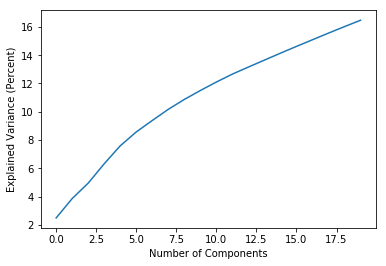

In [308]:
## FIGURE OUT HOW MANY COMPONENTS TO USE

plt.plot(var1)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance (Percent)")

In [309]:
print(lsa_tfidf_data.shape)
print(lsa_tfidf_data)

(961, 20)
[[ 8.27459983e-04  2.23123817e-02  4.78505716e-02 ...  7.79230688e-04
   2.95506999e-02 -2.27445494e-02]
 [ 8.27459983e-04  2.23123817e-02  4.78505716e-02 ...  7.79230688e-04
   2.95506999e-02 -2.27445494e-02]
 [ 5.09683100e-05  1.95606567e-03  4.52116354e-03 ... -2.74905196e-02
  -1.82098233e-02  1.59025942e-03]
 ...
 [ 3.75661810e-03  1.78191569e-01  5.06719017e-01 ...  1.89873775e-02
  -6.23943473e-03 -8.25302797e-03]
 [ 4.24927045e-03  1.31254010e-01  4.03316071e-01 ... -7.36802819e-03
  -1.59723844e-02  8.20538929e-04]
 [ 4.24927045e-03  1.31254010e-01  4.03316071e-01 ... -7.36802819e-03
  -1.59723844e-02  8.20538929e-04]]


In [310]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lsa_tfidf_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.001s...
[t-SNE] Computed neighbors for 961 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.051602
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.733803
[t-SNE] Error after 1000 iterations: 0.940738


(961, 2)

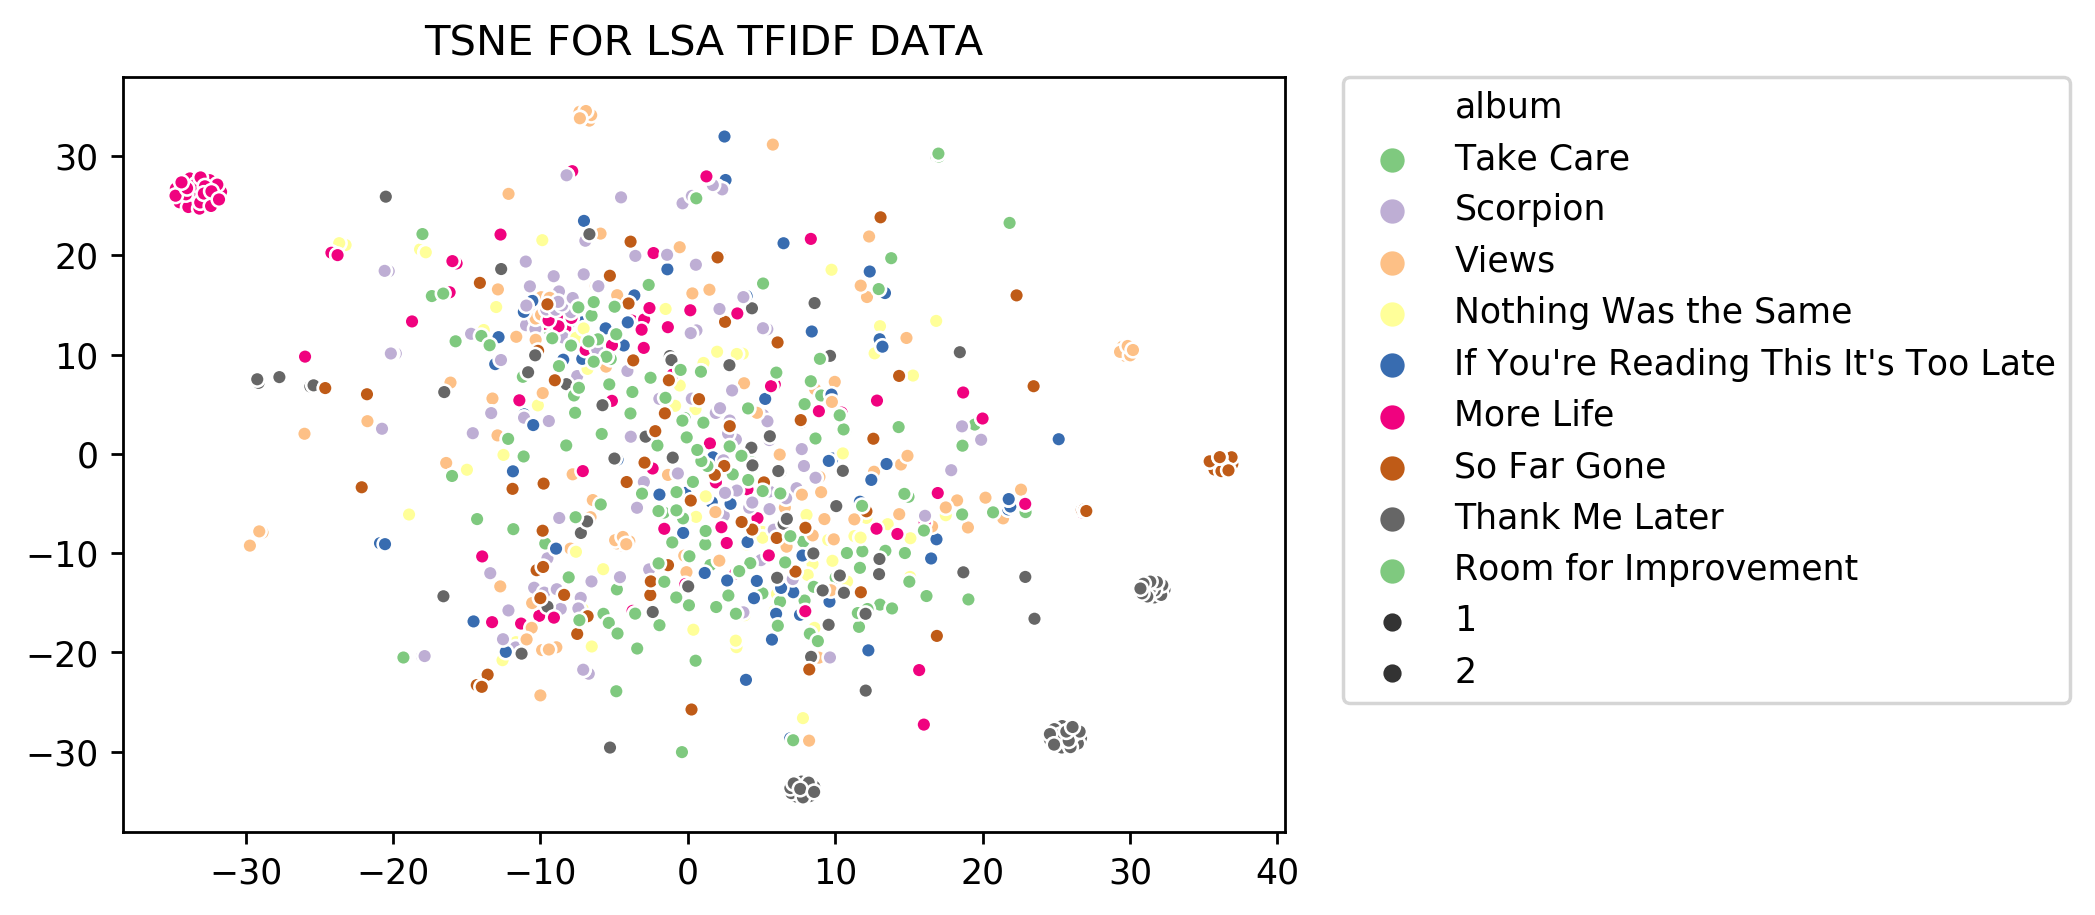

In [311]:
album = model_df.album
plt.figure(dpi=250)
plt.title("TSNE FOR LSA TFIDF DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], album,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [312]:
model_df.album.value_counts()

Views                                   135
Scorpion                                128
Thank Me Later                          126
More Life                               120
So Far Gone                             104
Take Care                               100
If You're Reading This It's Too Late     90
Nothing Was the Same                     82
Room for Improvement                     76
Name: album, dtype: int64

In [313]:
# nmf_cv DIMENSIONALITY REDUCTION ON CV
# Make the other two

n_comp = 20
nmf_cv = NMF(n_components=n_comp)

nmf_cv_data = nmf_cv.fit_transform(cv_data)

display_topics(nmf_cv,count_vectorizer.get_feature_names(),15)


Topic  0
ninja, ninjas, tell, fuck, really, cause, day, feel, man, money, city, real, make, look, hear

Topic  1
best, fuckin, fuckin best, best best, best fuckin, say, say fuckin, time, right, baby, real, gon, hit, swear, thing

Topic  2
say, cause, think, ninjas, need, ca, girl, camera, close, everybody, feel, try, miss, ai, city

Topic  3
better, love, heart, better love, love better, better heart, heart better, gon, bet, apart, tear, tear apart, love gon, gon tear, bet love

Topic  4
way, feel, feel way, things, say, young, way feel, ninja feel, ninja, way young, young ninja, ve, things say, stop, way ve

Topic  5
new, brand, brand new, new brand, new new, late, late late, doin, doin brand, girl, new girl, new doin, woah, girl brand, new late

Topic  6
ta, make, jump, ta ta, make jump, ta make, bend, lift, bend lift, jump jump, got, got ta, lift make, jump bend, make got

Topic  7
boy, ll, admit, ll admit, ga, admit ll, hot, things, man, hear, old, new, ga ga, thing, fuck

Topic  

In [314]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=30).fit_transform(nmf_cv_data)
X_embedded.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.001s...
[t-SNE] Computed neighbors for 961 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.016578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.238289
[t-SNE] Error after 1000 iterations: 0.842164


(961, 2)

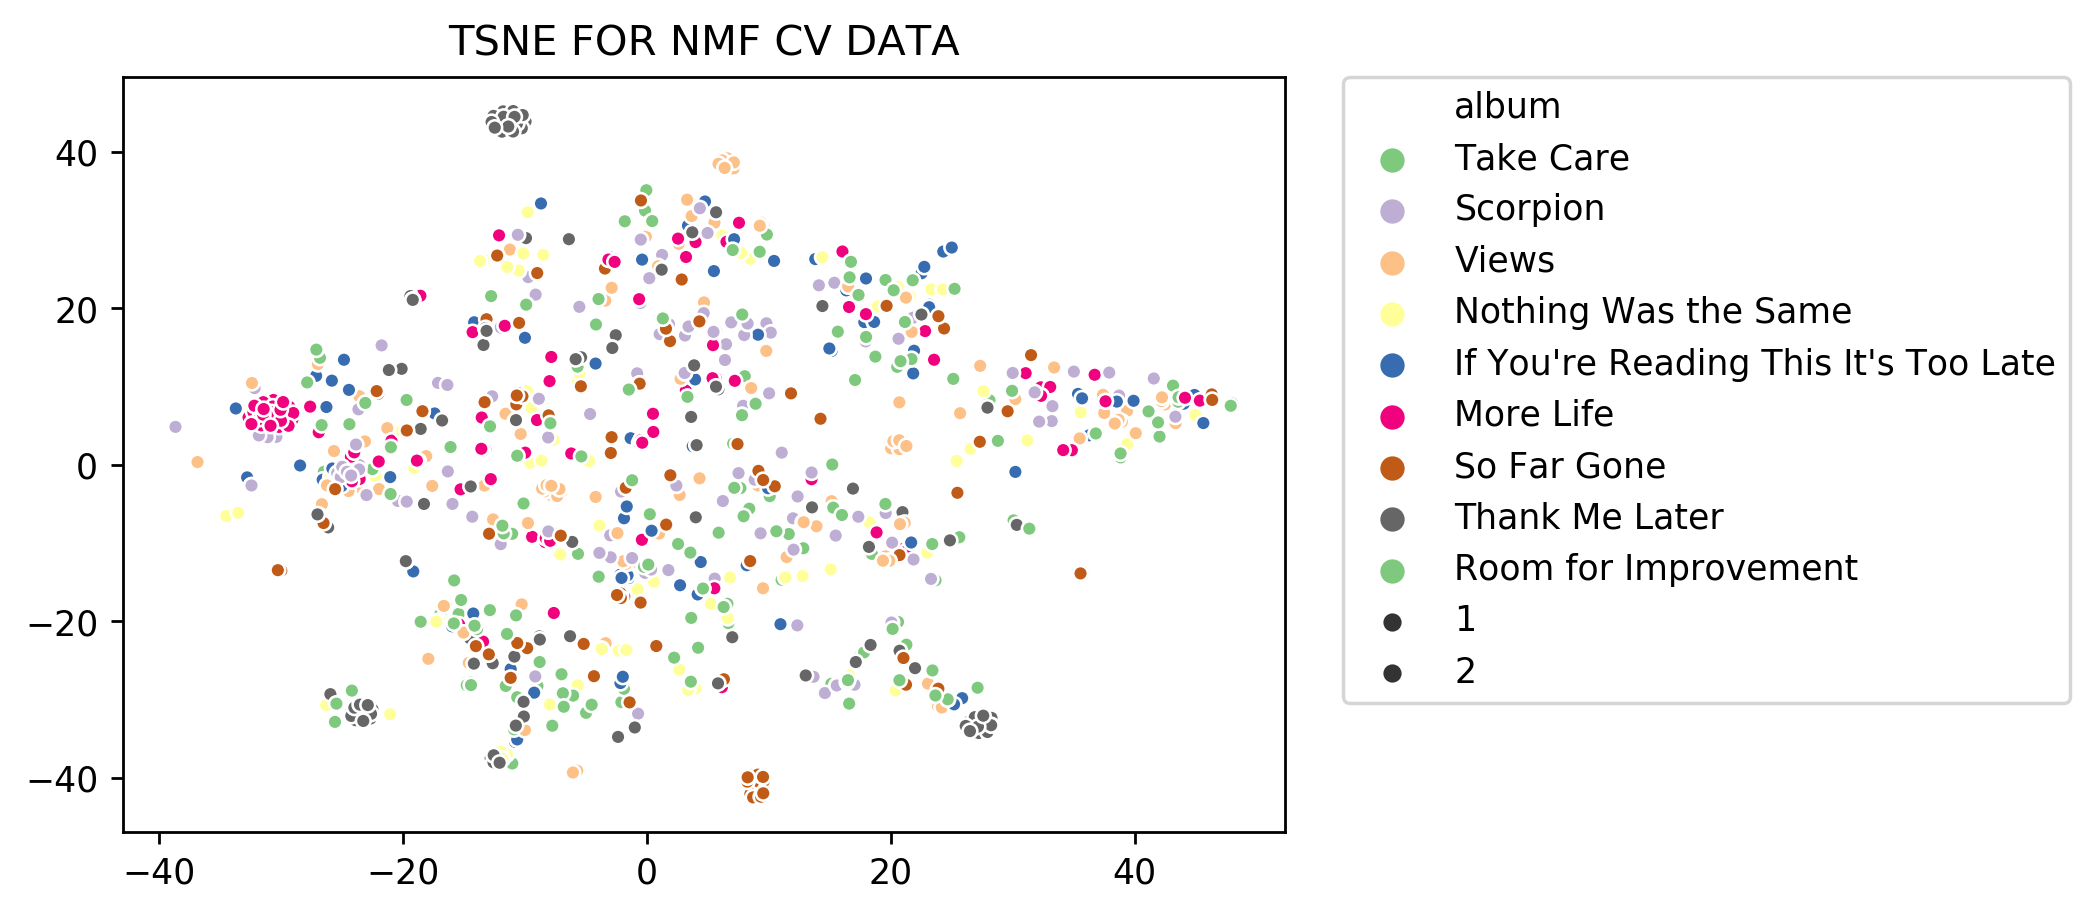

In [315]:
album = model_df.album
plt.figure(dpi=250)
plt.title("TSNE FOR NMF CV DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], album,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [316]:
# lsa_cv DIMENSIONALITY REDUCTION ON CV

n_comp = 20
lsa_cv = TruncatedSVD(n_components=n_comp)

lsa_cv_data = lsa_cv.fit_transform(cv_data)

var_cv = lsa_cv.explained_variance_ratio_

var_cv1 = np.cumsum(np.round(lsa_cv.explained_variance_ratio_, decimals=4)*100)

display_topics(lsa_cv,count_vectorizer.get_feature_names(),15)


Topic  0
say, make, cause, time, best, girl, right, ninjas, feel, need, love, tell, ai, fuckin, ll

Topic  1
best, fuckin, fuckin best, best best, best fuckin, say fuckin, say, time, hoe ai, beg, time hit, cause hold, hold time, swear spend, forever swear

Topic  2
cause, say, camera, close, think, need, everybody, embarrass pull, clothe, suit, flight, embarrass, ninjas, verse, stand

Topic  3
better, love, heart, better love, love better, better heart, heart better, apart, gon, bet, tear apart, tear, love gon, gon tear, bet love

Topic  4
new, ll, brand, brand new, boy, new brand, admit, ll admit, girl, come, man, ga, ta, admit ll, hear

Topic  5
new, brand new, brand, new brand, way, feel, feel way, better, new new, boy, ll admit, admit, late, things, heart

Topic  6
ta, new, make, brand, brand new, jump, new brand, ta ta, make jump, ta make, bend, lift, bend lift, jump jump, got ta

Topic  7
boy, ta, admit, ll admit, ll, ga, jump, admit ll, hot, ta ta, way, feel way, ga ga, make, m

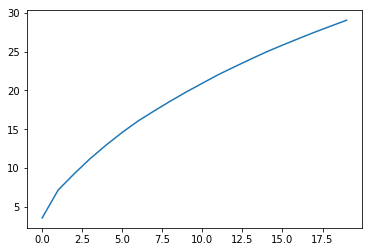

In [317]:
## FIGURE OUT HOW MANY COMPONENTS TO USE

plt.plot(var_cv1)

In [318]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lsa_cv_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.001s...
[t-SNE] Computed neighbors for 961 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.210570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.146317
[t-SNE] Error after 1000 iterations: 0.951613


(961, 2)

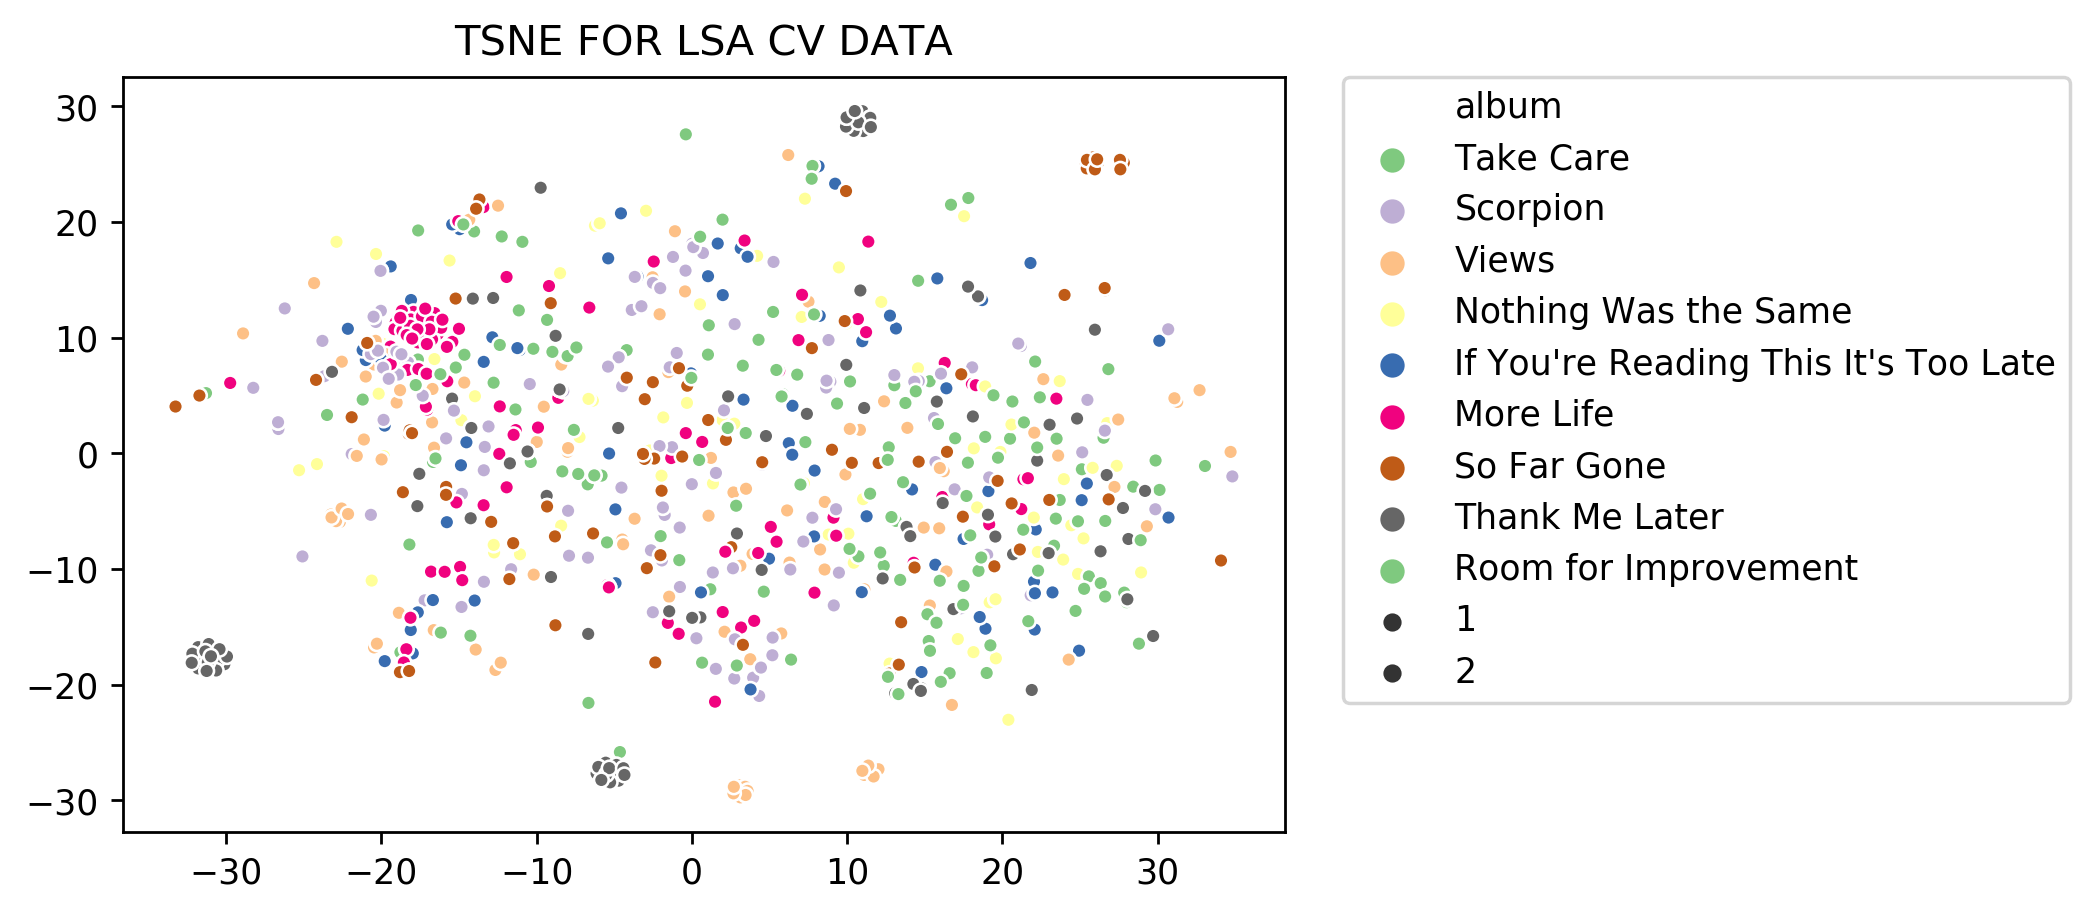

In [319]:
album = model_df.album
plt.figure(dpi=250)
plt.title("TSNE FOR LSA CV DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], album,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [320]:
## LDA WITH TFIDF

n_comp = 10
lda_tfidf = LatentDirichletAllocation(n_components=n_comp)

lda_tfidf_data = lda_tfidf.fit_transform(tfidf_data)

display_topics(lda_tfidf,tfidf_vectorizer.get_feature_names(),15)


Topic  0
dedicate dedicate, blowin, dedicate, need thing, dogs, dogs dog, company, lord, thing blowin, line blowin, ninjas really, dog, blowin line, blowin need, blowin ninjas

Topic  1
ai trippin, sleep ai, trippin, faithful, band, unnoticed, unnoticed baby, hustle unnoticed, fuck ninja, hustle, talkin language, faithful faithful, fore, dance got, power hold

Topic  2
houstatlantavegas, houstatlantavegas houstatlantavegas, shoot shoot, sure sure, dance song, belong belong, zombie track, started zombie, zombie, flex, houstatlanta, houstatlantavegas dance, stick houstatlantavegas, houstatlantavegas houstatlanta, ohhh ohh

Topic  3
motion, guess motion, motion guess, free smoke, home, hold home, smoke free, smoke, guess, blast, free, morning, hold, chune, chune headtop

Topic  4
sayin, controlla, controlla controlla, god, sayin sayin, sayin better, die legend, god god, god die, die, legend, start hatin, hatin make, lately sayin, drink right

Topic  5
gangstas, musta, did, baby baby, loo

In [321]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lda_tfidf_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.001s...
[t-SNE] Computed neighbors for 961 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.006386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.620544
[t-SNE] Error after 1000 iterations: 0.129461


(961, 2)

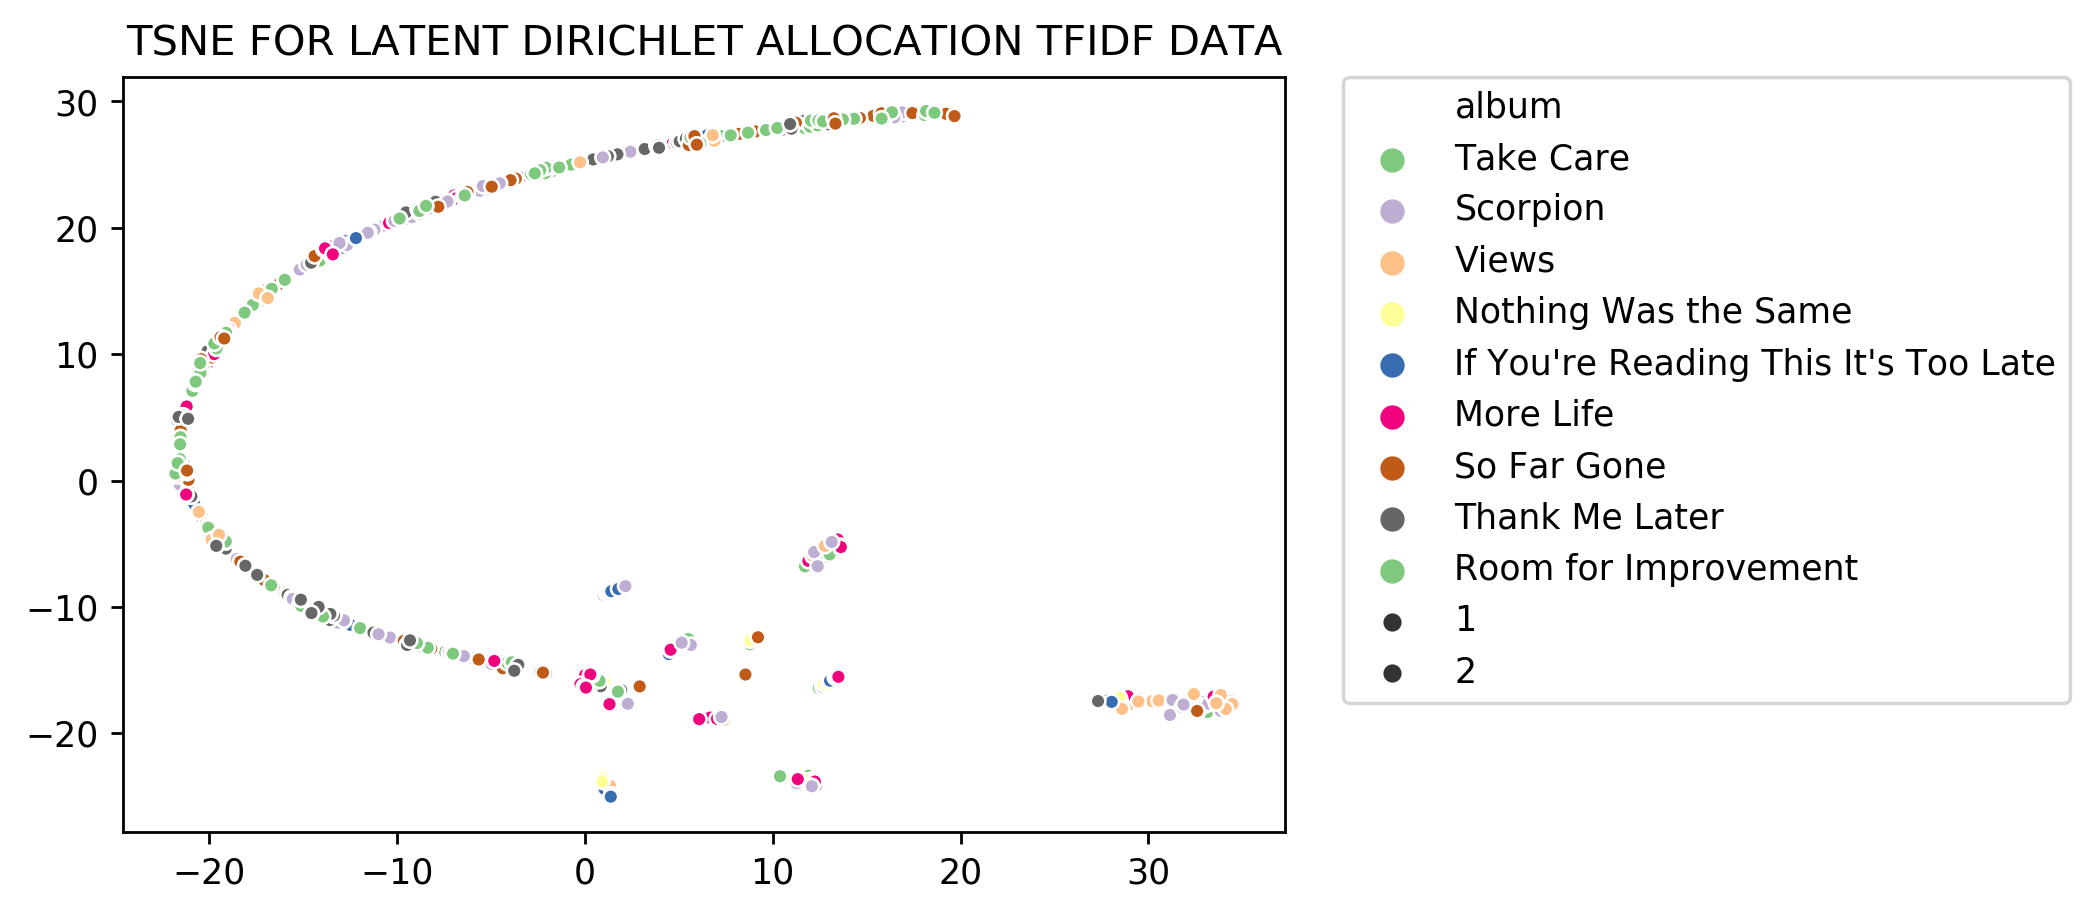

In [322]:
album = model_df.album
plt.figure(dpi=250)
plt.title("TSNE FOR LATENT DIRICHLET ALLOCATION TFIDF DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], album,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.');

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [323]:
## LDA WITH CV

n_comp = 10
lda_cv = LatentDirichletAllocation(n_components=n_comp)

lda_cv_data = lda_cv.fit_transform(cv_data)

# var = lda_tfidf.explained_variance_ratio_

# var1 = np.cumsum(np.round(lda_tfidf.explained_variance_ratio_, decimals=4)*100)

display_topics(lda_cv,count_vectorizer.get_feature_names(),15)


Topic  0
home, wishin, sick, wishin wishin, things, bring home, bad, hold, couple, refuse, sick sick, feel, lot, option, hold home

Topic  1
late, night, thing, mean, late night, tellin, break, ai tellin, time, cause, things, break break, slide, slide late, late late

Topic  2
watch, glow, love, watch glow, ninja, started, dedicate, team, face, dedicate dedicate, look, man, aww, wan, fuckin

Topic  3
good, time, good time, good good, time good, ones, ninjas, brea, brea brea, breakin, heart, breakin heart, kick push, ninjas wan, leg

Topic  4
way, feel, girl, make, come, feel way, say, ninja, ve, things, cause, man, ai, momma, young

Topic  5
houstatlantavegas, god, houstatlantavegas houstatlantavegas, god try, come busy, busy ll, die, dance song, song, dance, try god, mixin, vo, die legend, god god

Topic  6
say, right, love, time, make, better, cause, tell, need, girl, best, ll, let, ai, ninjas

Topic  7
ta, make, low, game, need need, goin, dawg, money, play, bein, wit, til, gots, t

In [324]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(lda_cv_data)
X_embedded.shape

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 961 samples in 0.001s...
[t-SNE] Computed neighbors for 961 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 961 / 961
[t-SNE] Mean sigma: 0.005136
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.300690
[t-SNE] Error after 1000 iterations: 0.094589


(961, 2)

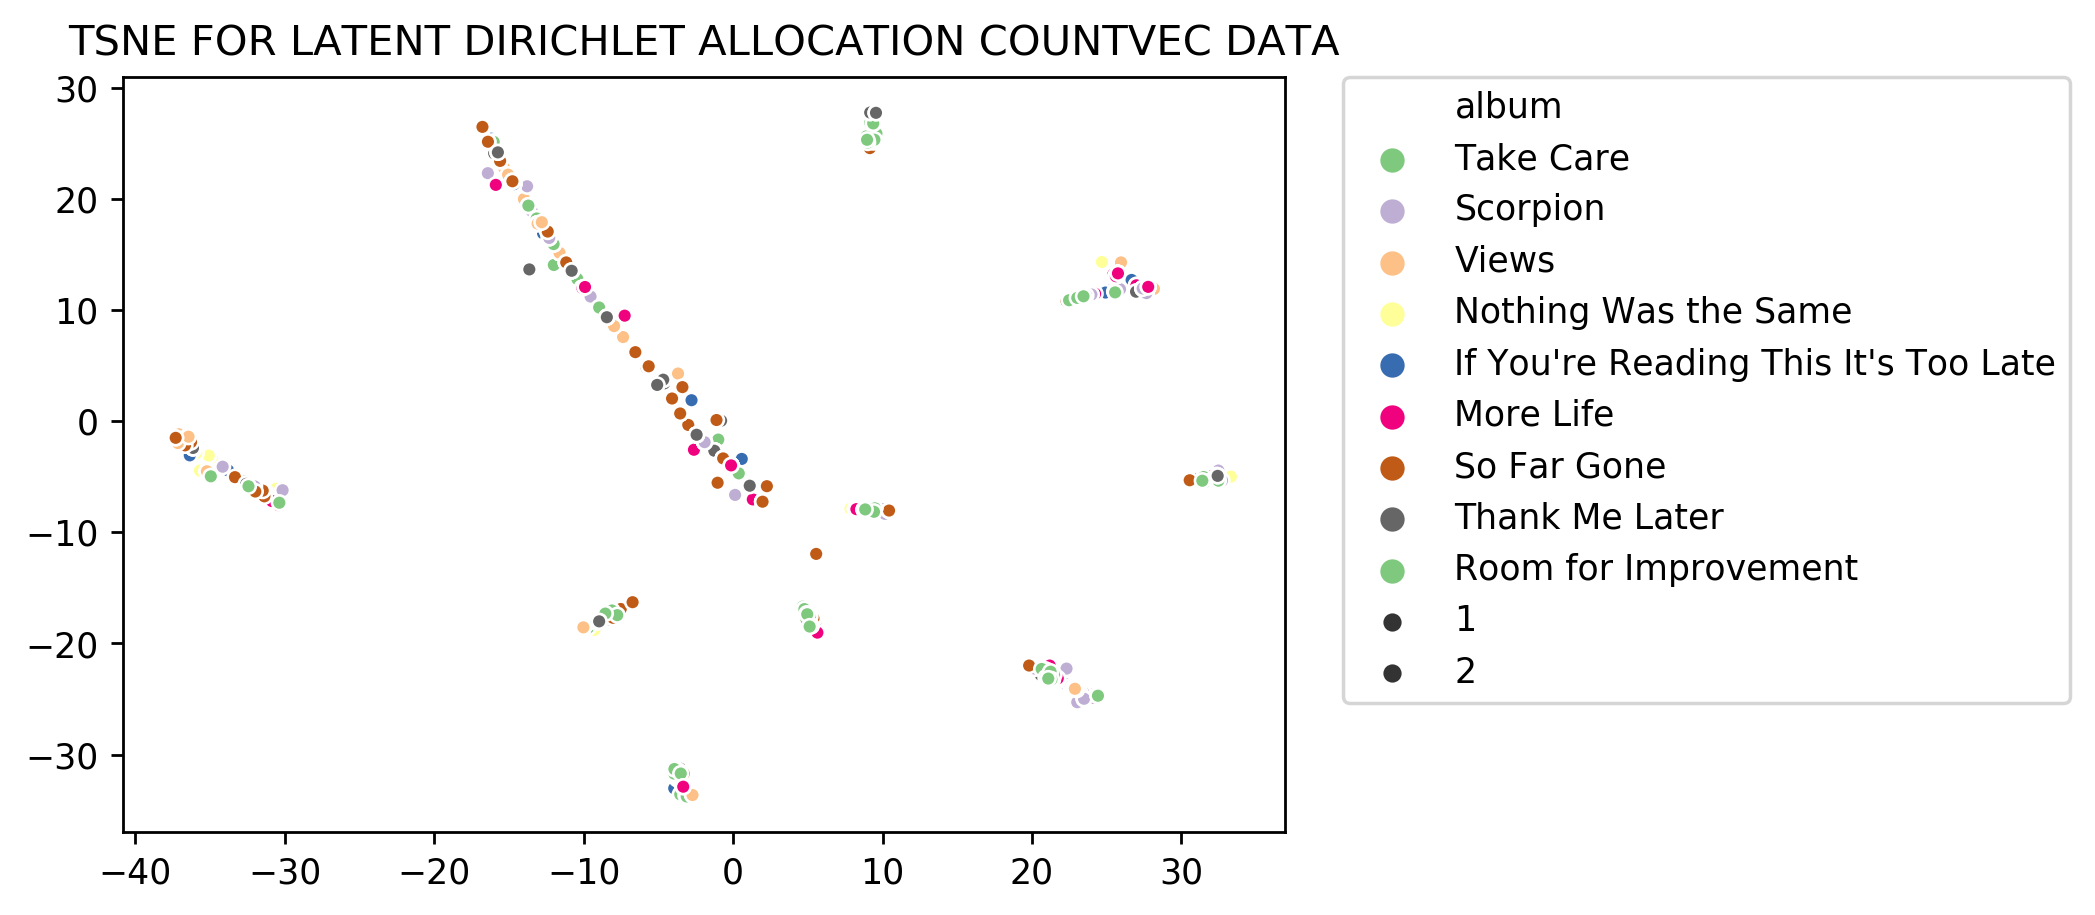

In [325]:
album = model_df.album
plt.figure(dpi=250)
plt.title("TSNE FOR LATENT DIRICHLET ALLOCATION COUNTVEC DATA")
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], album,
               size = 2, palette = 'Accent', alpha = 'auto',
              markers = '.')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [326]:
## PICKLE TRUNCATED SVD ON TFIDF_DATA SO YOU DON'T HAVE TO REFIT IT EACH TIME

# with open('models/lsa_tfidf.pkl', 'wb') as picklefile:
#     pickle.dump(lsa_tfidf, picklefile)

In [340]:
model_df[model_df['song_title'] == "Worst Behavior"]

,song_owner,song_title,song_element,verse,artist,album,verse_words,verse_stem,verse_lem,album_num
172,Drake,Worst Behavior,[Verse 1],"Worst..., Mothafucka never loved us, Fucka nev...",Drake,Nothing Was the Same,"[Worst, ..., ,, Mothafucka, never, loved, us, ...","worst ... , mothafucka never love us , fucka n...","Worst ... , Mothafucka never love us , Fucka n...",8
173,Drake,Worst Behavior,[Chorus],"On my worst behavior, no? They used to never w...",Drake,Nothing Was the Same,"[On, my, worst, behavior, ,, no, ?, They, used...","On my worst behavior , no ? they use to never ...","On my worst behavior , no ? They use to never ...",8
174,Drake,Worst Behavior,[Verse 2],"Hold up, hold my phone, Mothafuckas never love...",Drake,Nothing Was the Same,"[Hold, up, ,, hold, my, phone, ,, Mothafuckas,...","hold up , hold my phone , mothafucka never lov...","Hold up , hold my phone , Mothafuckas never lo...",8
175,Drake,Worst Behavior,[Chorus],"On my worst behavior, no? They used to never w...",Drake,Nothing Was the Same,"[On, my, worst, behavior, ,, no, ?, They, used...","On my worst behavior , no ? they use to never ...","On my worst behavior , no ? They use to never ...",8
176,Drake,Worst Behavior,[Verse 3],"Who's hot, who not? Tell me who rock, who sell...",Drake,Nothing Was the Same,"[Who, 's, hot, ,, who, not, ?, Tell, me, who, ...","who 's hot , who not ? tell me who rock , who ...","Who 's hot , who not ? Tell me who rock , who ...",8
177,Drake,Worst Behavior,[Outro],"Remember? Remember? Mothafucka, remember?, Hol...",Drake,Nothing Was the Same,"[Remember, ?, Remember, ?, Mothafucka, ,, reme...","rememb ? rememb ? mothafucka , rememb ? , hold...","Remember ? Remember ? Mothafucka , remember ? ...",8


In [328]:
model_df[model_df['song_title'] == "Marvin's Room"]

,song_owner,song_title,song_element,verse,artist,album,verse_words,verse_stem,verse_lem,album_num
157,Drake,Marvin's Room,[Verse 1: Drake],"Cups of the rosé, Bitches in my old phone, I s...",Drake,Take Care,"[Cups, of, the, rosé, ,, Bitches, in, my, old,...","cup of the rosé , bitch in my old phone , I sh...","Cups of the rosé , Bitches in my old phone , I...",6
158,Drake,Marvin's Room,[Chorus: Drake],"Fuck that ninja that you love so bad, I know y...",Drake,Take Care,"[Fuck, that, ninja, that, you, love, so, bad, ...","fuck that ninja that you love so bad , I know ...","Fuck that ninja that you love so bad , I know ...",6
159,Drake,Marvin's Room,[Bridge: Drake & Ericka Lee],"(Are you drunk right now?), I'm just sayin' yo...",Drake,Take Care,"[(, Are, you, drunk, right, now, ?, ), ,, I, '...","( are you drunk right now ? ) , I 'm just sayi...","( Are you drink right now ? ) , I 'm just sayi...",6
160,Drake,Marvin's Room,[Verse 2: Drake],"Uh, cups of the XO, All my people been here, I...",Drake,Take Care,"[Uh, ,, cups, of, the, XO, ,, All, my, people,...","Uh , cup of the XO , all my peopl been here , ...","Uh , cup of the XO , All my people be here , I...",6
161,Drake,Marvin's Room,[Chorus: Drake],"Fuck that ninja that you love so bad, I know y...",Drake,Take Care,"[Fuck, that, ninja, that, you, love, so, bad, ...","fuck that ninja that you love so bad , I know ...","Fuck that ninja that you love so bad , I know ...",6
162,Drake,Marvin's Room,[Bridge: Drake & Ericka Lee],"(Are you drunk right now?), I'm just sayin' yo...",Drake,Take Care,"[(, Are, you, drunk, right, now, ?, ), ,, I, '...","( are you drunk right now ? ) , I 'm just sayi...","( Are you drink right now ? ) , I 'm just sayi...",6
163,Drake,Marvin's Room,[Verse 3: Drake],"I think I'm addicted to naked pictures, And si...",Drake,Take Care,"[I, think, I, 'm, addicted, to, naked, picture...","I think I 'm addict to nake pictur , and sit t...","I think I 'm addict to naked picture , And sit...",6
164,Drake,Marvin's Room,[Bridge: Drake & Ericka Lee],"(Are you drunk right now?), I'm just sayin' yo...",Drake,Take Care,"[(, Are, you, drunk, right, now, ?, ), ,, I, '...","( are you drunk right now ? ) , I 'm just sayi...","( Are you drink right now ? ) , I 'm just sayi...",6
165,Drake,Marvin's Room,[Interlude: Drake],"You're not gonna come?, Guess I'm 'bout to jus...",Drake,Take Care,"[You, 're, not, gon, na, come, ?, ,, Guess, I,...","you 're not gon na come ? , guess I 'm 'bout t...","You 're not gon na come ? , Guess I 'm 'bout t...",6
166,Drake,Marvin's Room,[Outro: Drake],"Just throw up while I hold your hair back, Her...",Drake,Take Care,"[Just, throw, up, while, I, hold, your, hair, ...","just throw up while I hold your hair back , he...","Just throw up while I hold your hair back , He...",6


In [335]:
def get_recommendations(first_verse, model, vectorizer, training_vectors):
    '''
    first_article: (string) An article that we want to use to find similar articles
    model: (a fit dimensionality reducer) Projects vectorized words onto a subspace 
           (uses NMF or SVD/LSA typically)
    training_vectors: (numpy array shape) a (num_docs in training) x (NMF/SVD/LSA) dimensional array.
                      Used to train NearestNeighbors model
    '''
    new_vec = model.transform(
        vectorizer.transform([first_verse]))
    nn = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
    nn.fit(training_vectors)
    results = nn.kneighbors(new_vec)
    return results[1][0]

print(get_recommendations(model_df.verse_lem[163], lda_tfidf, tfidf_vectorizer, lda_tfidf_data))

[121 171 178  58 196 199  85 146 148 747]


In [336]:
def print_recommendations(first_verse,recommend_list):
    print(first_verse)
    print('\n------\n')
    for resp in recommend_list:
        print('\n --- Result --- \n')
        print(model_df.verse.iloc[resp])
        
rec_list = get_recommendations(model_df.verse_lem[163], lda_tfidf, tfidf_vectorizer, lda_tfidf_data)
print_recommendations(model_df.verse_lem[163],rec_list)

I think I 'm addict to naked picture , And sit talk 'bout bitch that we almost have , I do n't think I 'm conscious of makin ' monsters , Outta the women I sponsor 'til it all go bad , But , shit , it 's all good , We throw a party , yeah , we throw a party , Bitches come over , yeah , we throw a party , I be just call , ‘ cause they be just leavin ' , Talk to me , please , do n't have much to believe in , I need you right now , be you down to listen to me ? , Too many drink have be give to me , I get some women that 's livin ' off me , Paid for their flight and hotels , I 'm ashamed , Bet that you know them , I wo n't say no name , After a while , girl , they all seem the same , I 've have sex four time this week ; I 'll explain , Havin ' a hard time adjustin ' to fame , Sprite in that mixture , I 've be talkin ' crazy , girl , I 'm lucky that you pick up , Lucky that you stay on , I need someone to put this weight on , `` Well , I 'm sorry . ''

------


 --- Result --- 

I think I'm